In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, morphology, measure

# Load the skeleton (assuming the skeleton is already binary)
skeleton = np.load('skeleton.npy')  # Replace with the path to your numpy array


# Calculate total length
total_length = skeleton.sum()
print(f"Total length of the skeleton: {total_length} pixels")

# Identify branch points, endpoints, etc. using skimage
skeleton_labels = measure.label(skeleton)

# Measure individual branches
regions = measure.regionprops(skeleton_labels)
branch_lengths = [region.area for region in regions]
print(f"Branch lengths: {branch_lengths}")


Total length of the skeleton: 71696.0 pixels
Branch lengths: [38012.0, 807.0, 92.0, 94.0, 5137.0, 2374.0, 51.0, 136.0, 220.0, 3492.0, 267.0, 4620.0, 9098.0, 919.0, 372.0, 376.0, 104.0, 431.0, 491.0, 351.0, 1430.0, 1035.0, 272.0, 530.0, 190.0, 494.0, 301.0]


In [3]:
# Count the number of branches
num_branches = len(branch_lengths)
print(f"Number of branches: {num_branches}")

# Calculate the average length of branches
average_length = np.mean(branch_lengths) if branch_lengths else 0
print(f"Average length of branches: {average_length} pixels")

Number of branches: 27
Average length of branches: 2655.4074074074074 pixels


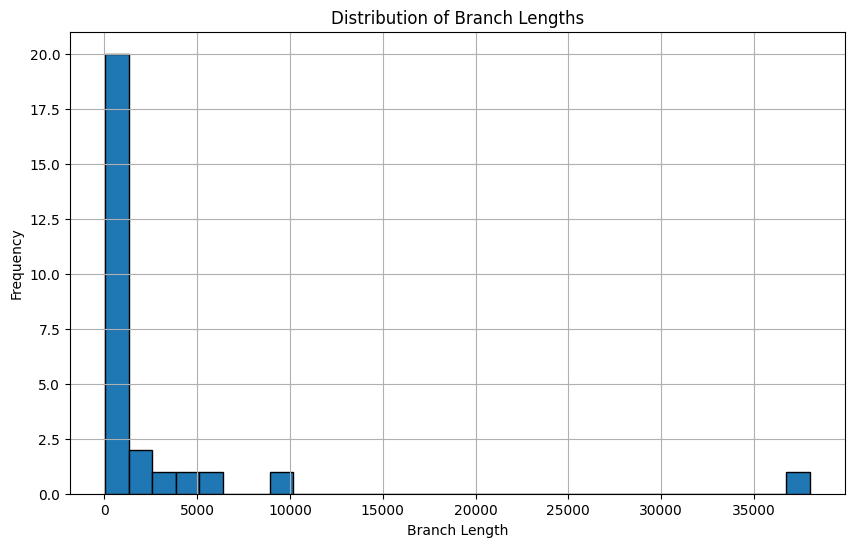

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(branch_lengths, bins=30, edgecolor='black')
plt.title('Distribution of Branch Lengths')
plt.xlabel('Branch Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [2]:
import numpy as np
from skimage.measure import euler_number

euler_num_3d = euler_number(skeleton, connectivity=3)
print(f"Euler Characteristic for 3D skeleton: {euler_num_3d}")

Euler Characteristic for 3D skeleton: 242


In [5]:
import numpy as np

def box_counting_fractal_dimension(Z, box_sizes):
    # Z is the binary skeleton (2D or 3D) where the centerline is marked as 1
    # box_sizes are the different sizes of boxes to cover the structure
    def boxcount(Z, size):
        # Count the number of non-empty boxes of size "size"
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], size), axis=0),
            np.arange(0, Z.shape[1], size), axis=1)

        # Count how many boxes have non-zero points (i.e., are filled)
        return len(np.where(S > 0)[0])

    # Normalize the grid if it's not square (for box-counting)
    Z = Z.astype(bool)
    assert len(Z.shape) == 2, "Only 2D fractal dimension is supported for this code"
    
    # Get counts for each box size
    counts = []
    for size in box_sizes:
        counts.append(boxcount(Z, size))
    
    # Fit a line to log(counts) vs log(1/box_size)
    coeffs = np.polyfit(np.log(box_sizes), np.log(counts), 1)
    
    # Fractal dimension is the slope of the line
    return -coeffs[0]


box_sizes = np.array([2, 4])  # Define box sizes, you can use more sizes
fractal_dimension = box_counting_fractal_dimension(skeleton, box_sizes)
print(f"Fractal Dimension: {fractal_dimension}")


AssertionError: Only 2D fractal dimension is supported for this code